<a href="https://colab.research.google.com/github/taaha3244/Oh-my-CNN/blob/main/Intro_to_CNNs_(CIFAR_10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **What is a Convolutional Neural Network?**

In machine learning, a classifier assigns a class label to a data point. For example, an image classifier produces a class label (e.g, bird, plane) for what objects exist within an image. A convolutional neural network, or CNN for short, is a type of classifier, which excels at solving this problem!

A CNN is a neural network: an algorithm used to recognize patterns in data. Neural Networks in general are composed of a collection of neurons that are organized in layers, each with their own learnable weights and biases. Let’s break down a CNN into its basic building blocks.

1. A **tensor** can be thought of as an n-dimensional matrix. In the CNN above, tensors will be 3-dimensional with the exception of the output layer.


2. A **neuron** can be thought of as a function that takes in multiple inputs and yields a single output. The outputs of neurons are represented above as the red → blue activation maps.

3. A **layer** is simply a collection of neurons with the same operation, including the same hyperparameters.

4. Kernel **weights and biases**, while unique to each neuron, are tuned during the training phase, and allow the classifier to adapt to the problem and dataset provided. They are encoded in the visualization with a yellow → green diverging colorscale. The specific values can be viewed in the Interactive Formula View by clicking a neuron or by hovering over the kernel/bias in the Convolutional Elastic Explanation View.

5. A CNN conveys a differentiable score function, which is represented as class scores in the visualization on the output layer.





We'll make a simple CNN using Tensorflow and Keras

Importing some requisite libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
print(tf.__version__)


2.15.0


Keras has inbuilt dataset of CIFAR 10,distributed into train and test set Tuples

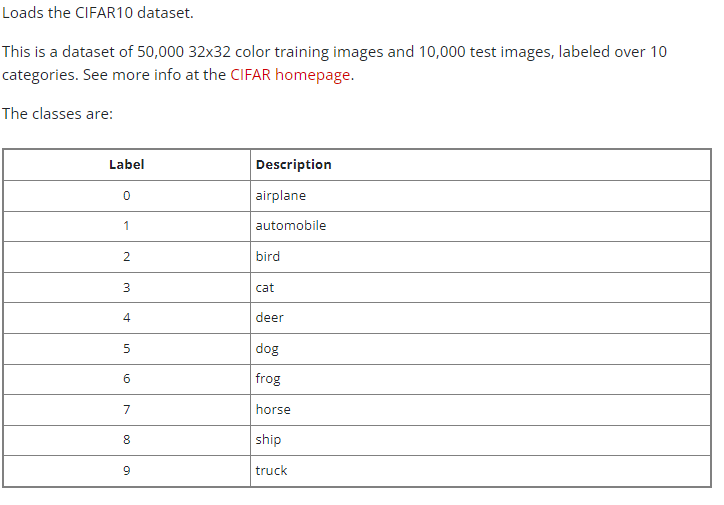

This is a multiclass image classification problem.

In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 11s 0us/step


In [3]:
# Dataset shapes
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)


Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


# The Anatomy of the shape

50000: This is the number of samples in the dataset. In the context of images, it means there are 50,000 individual images.

32: The first '32' refers to the height of each image in pixels. Each image in this dataset is 32 pixels tall.

32: The second '32' refers to the width of each image in pixels. Each image in this dataset is 32 pixels wide.

3: This number represents the number of channels in each image. In most color image datasets, this number is 3, corresponding to the three primary color channels: Red, Green, and Blue (RGB). This means each pixel in the image has three components (R, G, B), each specifying the intensity of red, green, and blue at that particular pixel. If this number were 1, it would indicate a grayscale image with only one channel.

In [24]:
x_train[0].shape

(32, 32, 3)

In [25]:
# CIFAR-10 classes
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

Visualizing some of the images from the data sets using random index

In [4]:
#getting 9 random indexes
rand_index=np.random.randint(0,len(x_train),9)

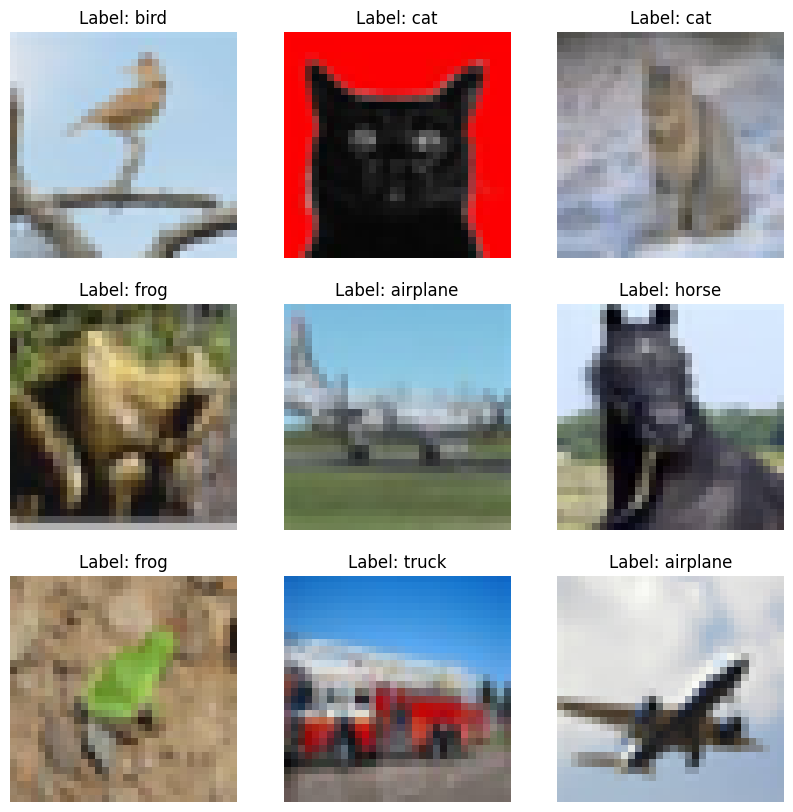

In [41]:
import matplotlib.pyplot as plt

# Plot first few images
plt.figure(figsize=(10,10))
for i,value  in enumerate(rand_index):
    plt.subplot(330 +1+ i)
    plt.imshow(x_train[value])
    plt.title(f"Label: {classes[y_train[value].item()]}")
    plt.axis('Off')
plt.show()


Checking the classes of first 10 Samples in the data set

In [42]:
# CIFAR-10 classes
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Check a few training labels
for i in range(10):
    print(f"Image {i} is a {classes[y_train[i][0]]}")


Image 0 is a frog
Image 1 is a truck
Image 2 is a truck
Image 3 is a deer
Image 4 is a automobile
Image 5 is a automobile
Image 6 is a bird
Image 7 is a horse
Image 8 is a ship
Image 9 is a cat


# Pre processing

1. Normalization:

Normalization typically involves scaling the pixel values to a range that the model works effectively with. For neural networks, especially those using activation functions like sigmoid or tanh, it's common to scale the values to be between 0 and 1. This can be done by dividing each pixel value by 255 (since pixel values range from 0 to 255).

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

2. Reshaping:

This is necessary if the format of your data does not match the input shape your model expects. For instance, some models might expect a 1-dimensional array for each image, while others, like CNNs, work with the 2D structure of the data. CIFAR-10 images are already in a 3D format (32x32x3), which is typically suitable for CNNs, so additional reshaping might not be necessary.






 3. Label Encoding and One-Hot Encoding:

If you're using categorical crossentropy as your loss function, you'll need to convert your labels to a one-hot encoded format. One-hot encoding transforms categorical labels into a format that neural networks can work with more effectively. For the CIFAR-10 dataset, the labels are already in a numerical format, but they need to be one-hot encoded.

In [8]:
from tensorflow.keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Making a Cnn Model  using Tensor Flow and Keras

In [10]:
model = Sequential()

# Convolutional layer with 32 filters, a kernel size of 3x3, ReLU activation, and input shape as CIFAR-10 images
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Dense layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer with 10 units (one for each class) and softmax activation
model.add(Dense(10, activation='softmax'))


# What did I just write above?

**Sequential Vs Functional API in keras**

Keras provides two main ways to build models: using the Sequential API and using the Functional API. Let's explore each and compare them:

**Sequential Model:**

The Sequential model in Keras is a linear stack of layers. It allows you to create models layer-by-layer in a step-by-step fashion.Its is a straightforward way of building models. As the name suggests, it allows you to create models layer-by-layer in a sequential manner. This means that each layer has exactly one input tensor and one output tensor.

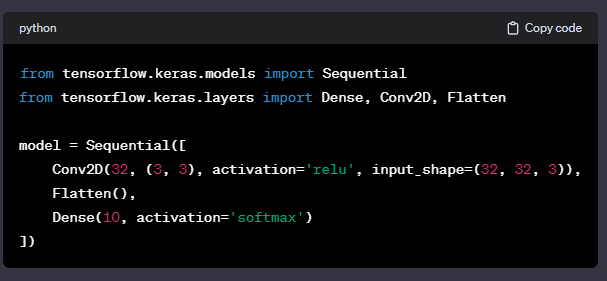

**Functional API**

The Functional API is a more flexible way of creating models in Keras, especially when your models are more complex. It allows you to build models with non-linear topology, shared layers, and even multiple inputs or outputs.

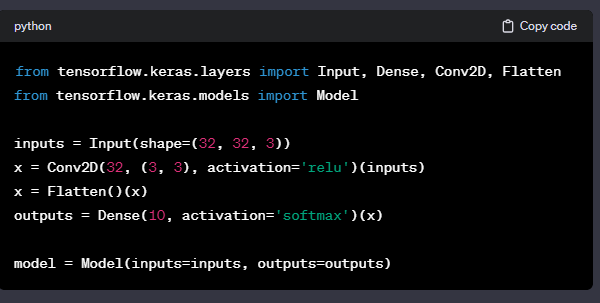

**Convolutional Layers**

The convolutional layers are the foundation of CNN, as they contain the learned kernels (weights), which extract features that distinguish different images from one another—this is what we want for classification! As you interact with the convolutional layer, you will notice links between the previous layers and the convolutional layers. Each link represents a unique kernel, which is used for the convolution operation to produce the current convolutional neuron’s output or activation map.

The convolutional neuron performs an elementwise dot product with a unique kernel and the output of the previous layer’s corresponding neuron. This will yield as many intermediate results as there are unique kernels. The convolutional neuron is the result of all of the intermediate results summed together with the learned bias.


Filters: 32. This means 32 different kernels (or feature detectors) are applied to the input images, creating 32 feature maps.

Kernel Size: (3, 3). Each filter is 3x3 in size.

Activation: 'relu' (Rectified Linear Unit). It introduces non-linearity to the model, allowing it to learn more complex patterns.

Padding: 'same'. This keeps the spatial dimensions (width and height) of the output feature maps the same as the input by padding the edges if needed.

Input Shape: (32, 32, 3). This is the shape of the input images (32x32 pixels with 3 color channels).

**MAX POOLING LAYER**

Reduces the spatial dimensions (height and width) of the input feature maps. It helps to reduce the computational load and overfitting by providing an abstracted form of the feature maps.

Pool Size: (2, 2). This means it takes the maximum value over 2x2 patches of the feature map, effectively reducing the size by half in each dimension.

**Dropout Layer:**

Regularization technique to prevent overfitting. It randomly sets a fraction of input units to 0 at each update during training.

Dropout Rate: 0.25 for the first two dropout layers and 0.5 for the third. This means 25% and 50% of the nodes are randomly dropped out during training, respectively.

 **Flattening:**

The Flatten layer converts the 2D feature maps into a 1D vector. This is necessary to connect the convolutional layers to the fully connected dense layer.

**Dense Layer:**

Fully connected layer.

Units: 128. This layer has 128 neurons.

Activation: 'relu'. It adds non-linearity to the model, enabling it to learn more complex patterns.

 **Output Layer (Dense):**

 Units: 10. Corresponds to the number of classes in the CIFAR-10 dataset.

Activation: 'softmax'. It is used for multi-class classification, and it outputs a probability distribution over the 10 classes.


This CNN model starts with two sets of convolutional and max pooling layers for feature extraction. Each set of layers starts with a higher number of filters to capture more complex features. After flattening the feature maps, the model uses dense layers for classification. Dropout layers are added for regularization to reduce overfitting. The final layer is a dense layer with softmax activation, suitable for multi-class classification.

In [11]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [12]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [13]:
from sklearn.model_selection import train_test_split

# Split the training data into a training set and a validation set
# Here, 20% of the data will be used for validation
x_train_new, x_val, y_train_new, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [14]:
history = model.fit(x_train_new, y_train_new, epochs=10, batch_size=64, validation_data=(x_val, y_val))


Epoch 1/10
625/625 [==============================] - 210s 332ms/step - loss: 1.7526 - accuracy: 0.3514 - val_loss: 1.3574 - val_accuracy: 0.5234
Epoch 2/10
625/625 [==============================] - 202s 323ms/step - loss: 1.3611 - accuracy: 0.5072 - val_loss: 1.0958 - val_accuracy: 0.6025
Epoch 3/10
625/625 [==============================] - 204s 327ms/step - loss: 1.1810 - accuracy: 0.5809 - val_loss: 0.9706 - val_accuracy: 0.6574
Epoch 4/10
625/625 [==============================] - 197s 315ms/step - loss: 1.0738 - accuracy: 0.6204 - val_loss: 0.9058 - val_accuracy: 0.6766
Epoch 5/10
625/625 [==============================] - 188s 301ms/step - loss: 0.9912 - accuracy: 0.6557 - val_loss: 0.8315 - val_accuracy: 0.7063
Epoch 6/10
625/625 [==============================] - 199s 319ms/step - loss: 0.9310 - accuracy: 0.6736 - val_loss: 0.8075 - val_accuracy: 0.7217
Epoch 7/10
625/625 [==============================] - 202s 324ms/step - loss: 0.8771 - accuracy: 0.6952 - val_loss: 0.7670 -

# Plotting Accuracy and Loss of the Model over Train and Val Set


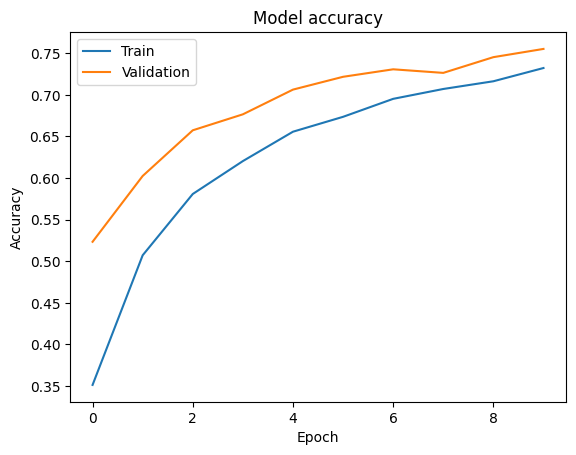

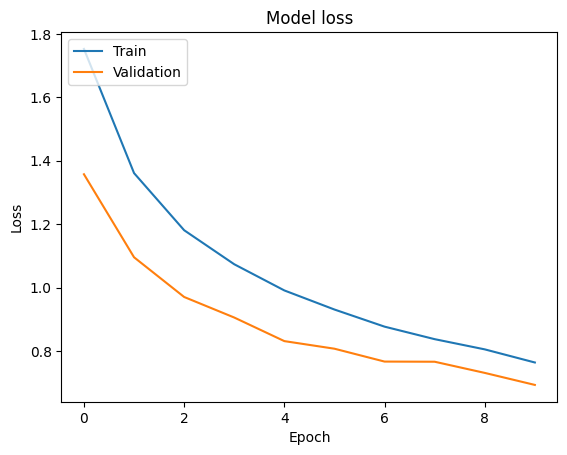

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Evaluating the model over Test data

In [16]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


313/313 [==============================] - 12s 38ms/step - loss: 0.6969 - accuracy: 0.7579
Test accuracy: 0.7579


Visualize The Pictures with Prediction

1/1 [==============================] - 0s 161ms/step


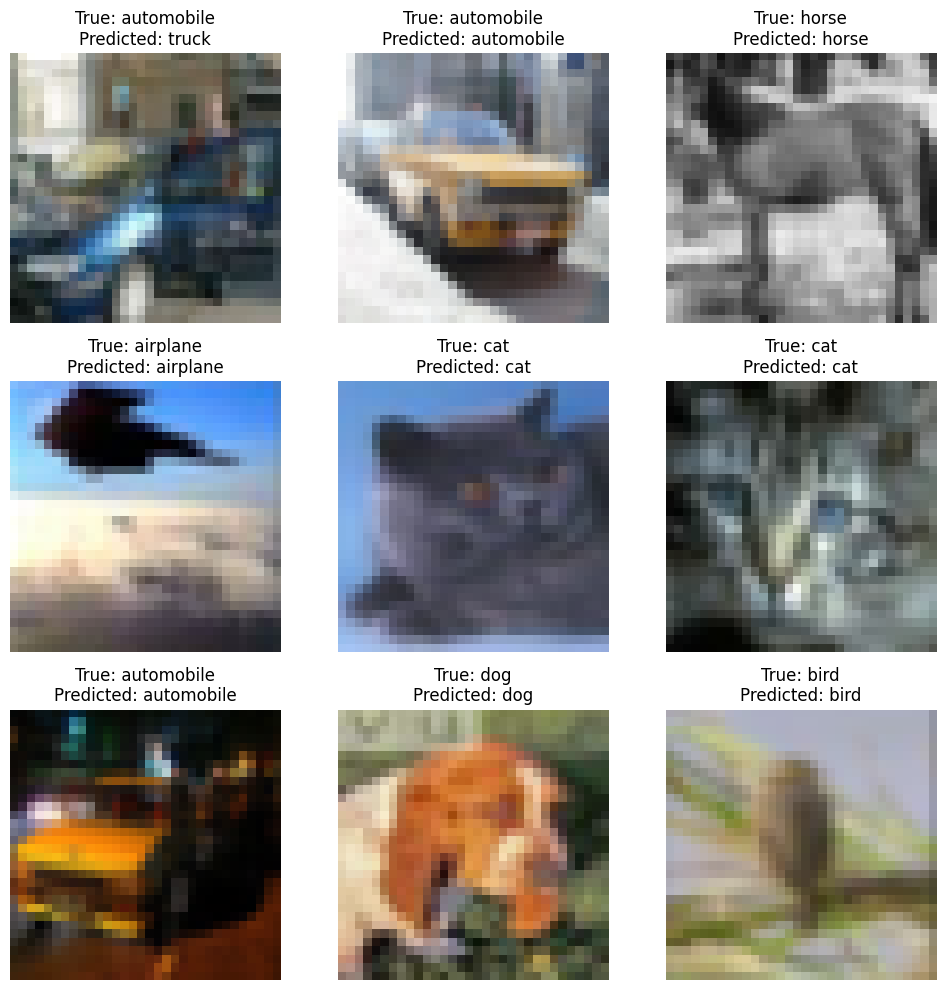

In [17]:
import numpy as np
import matplotlib.pyplot as plt


# Select 9 random images and labels from the test set
indices = np.random.choice(range(len(x_test)), 9)
images = x_test[indices]
true_labels = y_test[indices]

predicted_labels = model.predict(images)
predicted_labels = np.argmax(predicted_labels, axis=1)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"True: {class_names[true_labels[i][0]]}\nPredicted: {class_names[predicted_labels[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Plotting a Confusion matrix for test labels

In [18]:

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(predicted_classes, axis=1)
true_classes = y_test.ravel()  # Flatten y_test to match predicted_classes shape


313/313 [==============================] - 12s 38ms/step


In [43]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_classes, predicted_classes)
cm

array([[797,  13,  51,  18,  10,   1,   6,  13,  50,  41],
       [ 21, 872,   0,   5,   2,   3,   4,   0,  13,  80],
       [ 65,   6, 616,  34,  80,  78,  66,  32,  15,   8],
       [ 25,   5,  59, 518,  58, 201,  60,  42,  17,  15],
       [ 24,   4,  73,  60, 665,  27,  57,  77,   9,   4],
       [ 12,   2,  35, 144,  34, 689,  14,  61,   3,   6],
       [  8,   3,  47,  44,  31,  20, 826,   6,   8,   7],
       [ 12,   3,  39,  23,  38,  48,   1, 826,   1,   9],
       [ 45,  16,   6,   9,   1,   2,   3,   7, 887,  24],
       [ 18,  46,   4,  10,   1,   1,   5,  13,  19, 883]])

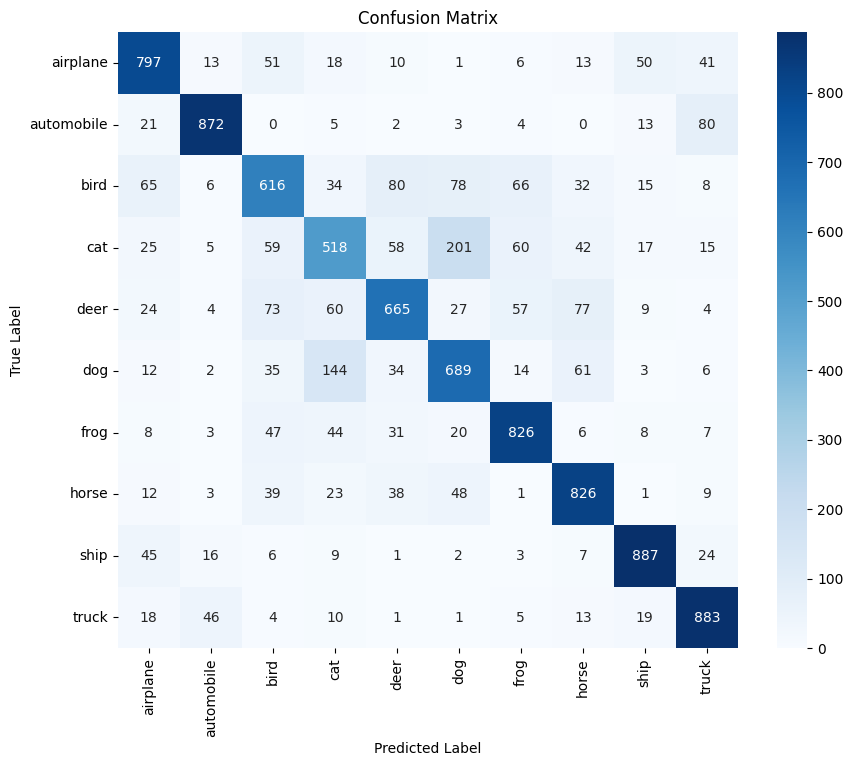

In [20]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


REFERENCES

https://poloclub.github.io/cnn-explainer/